In [434]:
import pandas as pd
import numpy as np

# data\rosters\2023_master_roster.csv
roster_path = '../../data/rosters/2022_master_roster.csv'

year = '2022'

# Read in roster
df = pd.read_csv(roster_path)



## Create plots of How MSU and other Big Ten teams compare on average age and class rank (experience)

In [435]:
## Clean up roster

# Before diving into the analysis, let's clean the data a bit.
# 1. Remove the 'Unnamed: 0' column, as it seems to be an unnecessary index column.
# 2. Convert the 'DOB' column to datetime format for age calculation.
# 3. Check for any missing values.

# Remove 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'DOB' to datetime format
df['DOB'] = pd.to_datetime(df['DOB'])

# Check for missing values
missing_values = df.isnull().sum()
# missing_values


In [436]:
# Calculate the current year to find the age of players
from datetime import date

# Calculate each players age in days
# Assuming 'DOB' is a datetime column
today = pd.Timestamp(date.today())
df['Age'] = (today - df['DOB']).dt.days


# Group the data by 'School' (team) and calculate the mean age and mean class rank (if possible)
# For class rank, we'll map Freshman to 1, Sophomore to 2, etc.

# Mapping class rank
class_rank_mapping = {'Fr': 1, 'So': 2, 'Jr': 3, 'Sr': 4, 'Gr': 5}
df['Class_Rank'] = df['Yr.'].map(class_rank_mapping)

# Calculate mean age and mean class rank for each team
grouped_by_team = df.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()



# Sort the teams by youngest and oldest based on mean age and mean class rank
youngest_by_age = grouped_by_team.sort_values('Age').iloc[0]
oldest_by_age = grouped_by_team.sort_values('Age', ascending=False).iloc[0]

youngest_by_class_rank = grouped_by_team.sort_values('Class_Rank').iloc[0]
oldest_by_class_rank = grouped_by_team.sort_values('Class_Rank', ascending=False).iloc[0]

## Display some results
# youngest_by_age, oldest_by_age, youngest_by_class_rank, oldest_by_class_rank


## Where MSU ranks by age and class position

In [437]:
# First, let's find out where Michigan State ranks in terms of average age and class rank.
michigan_state_age_rank = grouped_by_team[grouped_by_team['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_class_rank = grouped_by_team[grouped_by_team['School'] == 'Michigan-State']['Class_Rank'].values[0]

# Now, let's find out their ranks among all teams.
age_rank = grouped_by_team.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_age_rank, michigan_state_class_rank, michigan_state_age_rank_position, michigan_state_class_rank_position, total_teams


(8507.892857142857, 3.0714285714285716, 37, 60, 62)

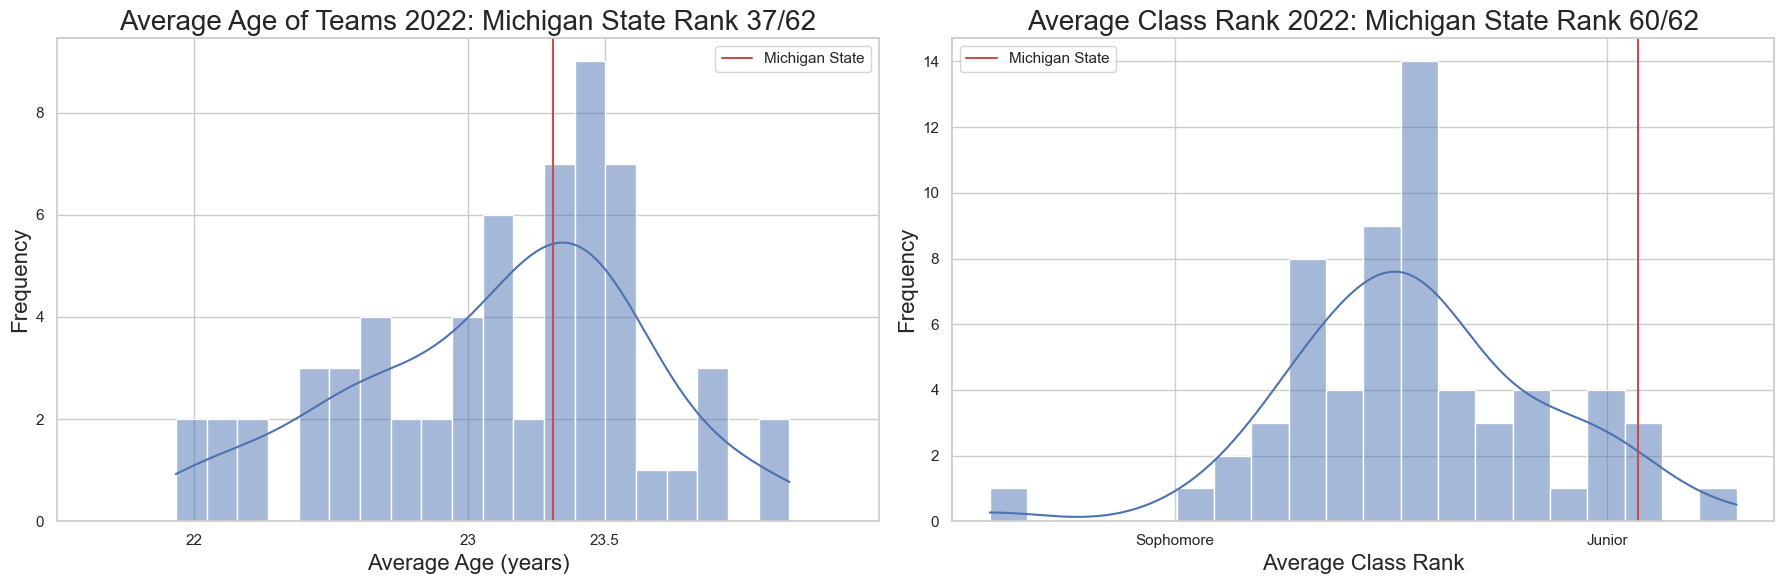

In [438]:
# Let's create visualizations to show where Michigan State sits within the dataset in terms of average age and class rank.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0])
axes[0].axvline(michigan_state_age_rank, color='r', linestyle='-', label='Michigan State')
axes[0].set_title(f'Average Age of Teams {year}: Michigan State Rank {michigan_state_age_rank_position}/{total_teams}')
# Set font size for title
axes[0].title.set_size(20)

axes[0].set_xlabel('Average Age (years)')
axes[0].set_ylabel('Frequency')
# Set font size for x and y labels
axes[0].xaxis.label.set_size(16)
axes[0].yaxis.label.set_size(16)

# Convert x-tick labels into whole years and quarters of a year
axes[0].set_xticks([20.5*365, 21*365, 22*365, 23*365, 23.5*365])
axes[0].set_xticklabels(['20.5', '21', '22', '23', '23.5'])
# Set the range of the x-axis based on range of data
axes[0].set_xlim([21.5*365, 24.5*365])

axes[0].legend()



# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1])
axes[1].axvline(michigan_state_class_rank, color='r', linestyle='-', label='Michigan State')
axes[1].set_title(f'Average Class Rank {year}: Michigan State Rank {michigan_state_class_rank_position}/{total_teams}')
# Set font size for title
axes[1].title.set_size(20)

axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')
# Set font size for x and y labels
axes[1].xaxis.label.set_size(16)
axes[1].yaxis.label.set_size(16)
axes[1].legend()

# Change the tick marks on the x-axis to strings, 2.0 = Sophomore, etc.
axes[1].set_xticks([2, 3])
axes[1].set_xticklabels(['Sophomore', 'Junior'])
plt.tight_layout()
plt.show()


## Filter to just defenseman an just D and Goalies

In [439]:
## Dataframe of just defensemen
# Assuming 'Position' is the column that holds the player's position
df_defense_goalies = df[df['Position'].isin(['Defensemen', 'Goaltenders'])]
df_defense = df[df['Position'] == 'Defensemen']

# For Defensemen and Goalies
grouped_by_team_def_goal = df_defense_goalies.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()

# For just Defensemen
grouped_by_team_def = df_defense.groupby('School').agg({
    'Age': 'mean',
    'Class_Rank': 'mean'
}).reset_index()

# conver the Age column in both dataframes to years with 2 decimal places
grouped_by_team_def_goal['Age'] = grouped_by_team_def_goal['Age'] / 365
grouped_by_team_def_goal['Age'] = grouped_by_team_def_goal['Age'].round(2)

grouped_by_team_def['Age'] = grouped_by_team_def['Age'] / 365
grouped_by_team_def['Age'] = grouped_by_team_def['Age'].round(2)

# Sort these new grouped DataFrames
# For example, for Defensemen and Goalies
youngest_by_age_def_goal = grouped_by_team_def_goal.sort_values('Age').iloc[0]
oldest_by_age_def_goal = grouped_by_team_def_goal.sort_values('Age', ascending=False).iloc[0]

youngest_by_class_rank_def_goal = grouped_by_team_def_goal.sort_values('Class_Rank').iloc[0]
oldest_by_class_rank_def_goal = grouped_by_team_def_goal.sort_values('Class_Rank', ascending=False).iloc[0]


# Calculate michigan state's rank among all teams for Defensemen and Goalies


# For Defensemen and Goalies
print("Defensemen and Goalies:")
print("Youngest by age:", youngest_by_age_def_goal)
print("Oldest by age:", oldest_by_age_def_goal)
print("Youngest by class rank:", youngest_by_class_rank_def_goal)
print("Oldest by class rank:", oldest_by_class_rank_def_goal)




Defensemen and Goalies:
Youngest by age: School         Harvard
Age              21.92
Class_Rank    2.538462
Name: 21, dtype: object
Oldest by age: School        Canisius
Age              24.48
Class_Rank         3.5
Name: 12, dtype: object
Youngest by class rank: School        Stonehill
Age               22.54
Class_Rank          1.9
Name: 56, dtype: object
Oldest by class rank: School        Canisius
Age              24.48
Class_Rank         3.5
Name: 12, dtype: object


In [440]:
##################################
# Calculate Michigan State Rank in dataframe with goalies and defensemen


michigan_state_def_goal_age_rank = grouped_by_team_def_goal[grouped_by_team_def_goal['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_def_goal_class_rank = grouped_by_team_def_goal[grouped_by_team_def_goal['School'] == 'Michigan-State']['Class_Rank'].values[0]

# # Find rank among all teams
age_rank = grouped_by_team_def_goal.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team_def_goal.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_def_goal_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_def_goal_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_def_goal_age_rank, michigan_state_def_goal_class_rank, michigan_state_def_goal_age_rank_position, michigan_state_def_goal_class_rank_position, total_teams


(23.18, 3.25, 33, 59, 62)

In [441]:
###############
# Do the same for just Defensemen

michigan_state_def_age_rank = grouped_by_team_def[grouped_by_team_def['School'] == 'Michigan-State']['Age'].values[0]
michigan_state_def_class_rank = grouped_by_team_def[grouped_by_team_def['School'] == 'Michigan-State']['Class_Rank'].values[0]

# # Find rank among all teams
age_rank = grouped_by_team_def.sort_values('Age').reset_index(drop=True).reset_index()
class_rank = grouped_by_team_def.sort_values('Class_Rank').reset_index(drop=True).reset_index()

michigan_state_def_age_rank_position = age_rank[age_rank['School'] == 'Michigan-State']['index'].values[0] + 1
michigan_state_def_class_rank_position = class_rank[class_rank['School'] == 'Michigan-State']['index'].values[0] + 1

# Total number of teams for context
total_teams = len(grouped_by_team)

michigan_state_def_age_rank, michigan_state_def_class_rank, michigan_state_def_age_rank_position, michigan_state_def_class_rank_position, total_teams


(22.97, 3.111111111111111, 26, 57, 62)

In [442]:
# Function to create the plots
def create_plots(df, title_suffix, michigan_state_age_rank, michigan_state_age_rank_position, michigan_state_class_rank, michigan_state_class_rank_position):
    sns.set(style="whitegrid")

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    sns.histplot(df['Age'], kde=True, bins=20, ax=axes[0])
    axes[0].axvline(michigan_state_age_rank, color='r', linestyle='-', label='Michigan State')
    axes[0].set_title(f'Average Age of {title_suffix}: {year} Michigan State Rank {michigan_state_age_rank_position}/{len(df)}')
    axes[0].title.set_size(20)
    axes[0].set_xlabel('Average Age (years)')
    axes[0].xaxis.label.set_size(16)
    axes[0].set_ylabel('Frequency')
    axes[0].yaxis.label.set_size(16)
    axes[0].legend()
    axes[0].set_xticks([20.5, 21, 22, 23, 23.5, 24])
    ################### Set the range of the x-axis based on range of data
    axes[0].set_xlim([21.5, 24])


    sns.histplot(df['Class_Rank'], kde=True, bins=20, ax=axes[1])
    axes[1].axvline(michigan_state_class_rank, color='r', linestyle='-', label='Michigan State')
    axes[1].set_title(f'Class Rank of {title_suffix}: {year} Michigan State Rank {michigan_state_class_rank_position}/{len(df)}')
    axes[1].title.set_size(20)
    axes[1].set_xlabel('Average Class Rank')
    axes[1].xaxis.label.set_size(16)
    axes[1].set_ylabel('Frequency')
    axes[1].yaxis.label.set_size(16)
    axes[1].legend()
    axes[1].set_xticks([2, 3])
    axes[1].set_xticklabels(['Sophomore', 'Junior'])

    plt.tight_layout()
    plt.show()


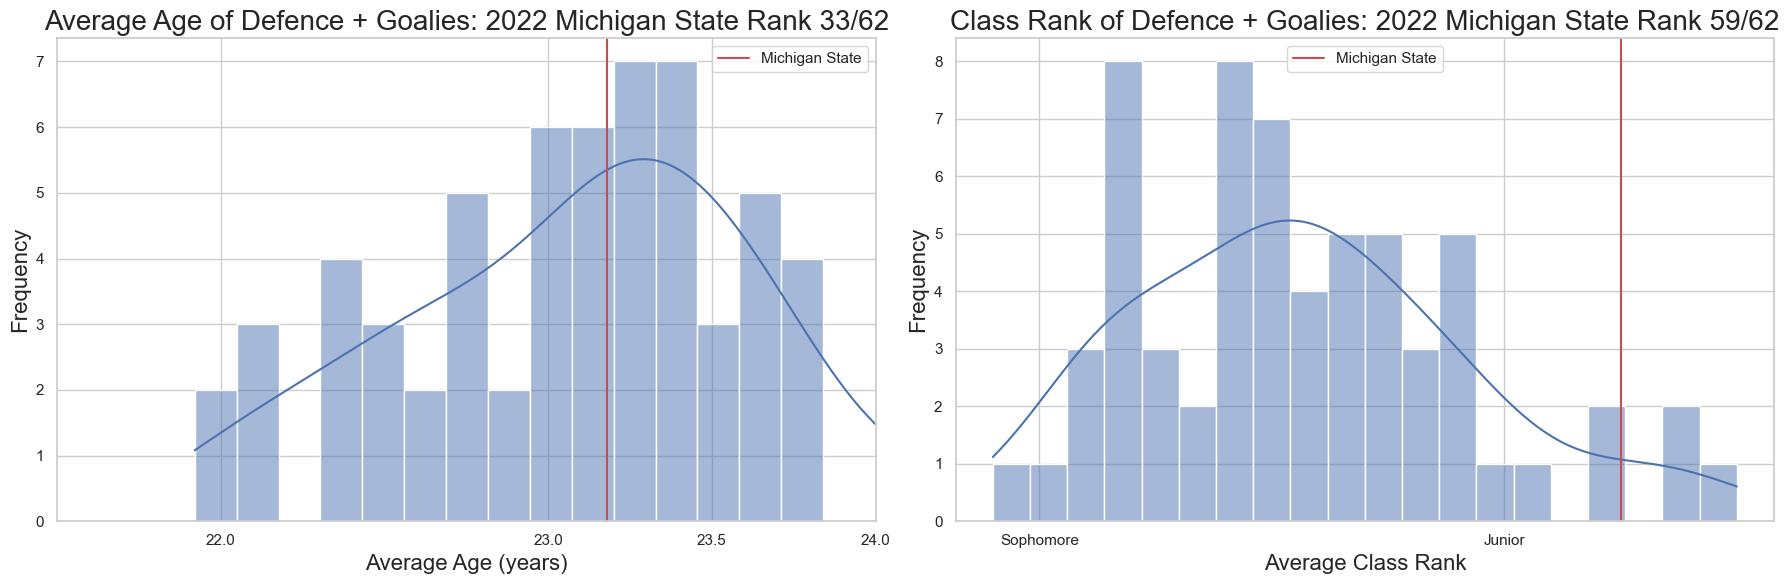

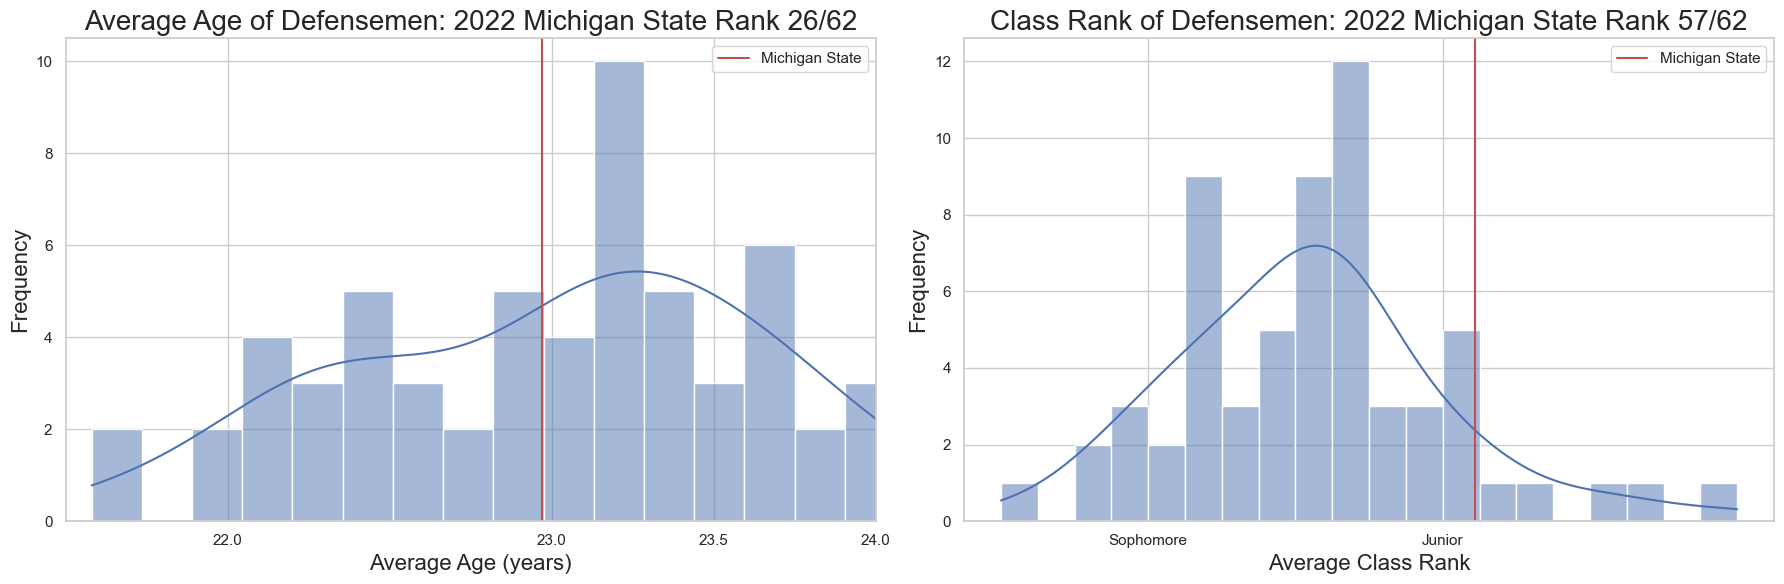

In [443]:
# Create plots for Defensemen and Goalies
create_plots(
    grouped_by_team_def_goal, 
    'Defence + Goalies', 
    michigan_state_def_goal_age_rank, 
    michigan_state_def_goal_age_rank_position, 
    michigan_state_def_goal_class_rank, 
    michigan_state_def_goal_class_rank_position
)

# Create plots for just Defensemen
create_plots(
    grouped_by_team_def, 
    'Defensemen', 
    michigan_state_def_age_rank, 
    michigan_state_def_age_rank_position, 
    michigan_state_def_class_rank, 
    michigan_state_def_class_rank_position
)


## All B1G Teams

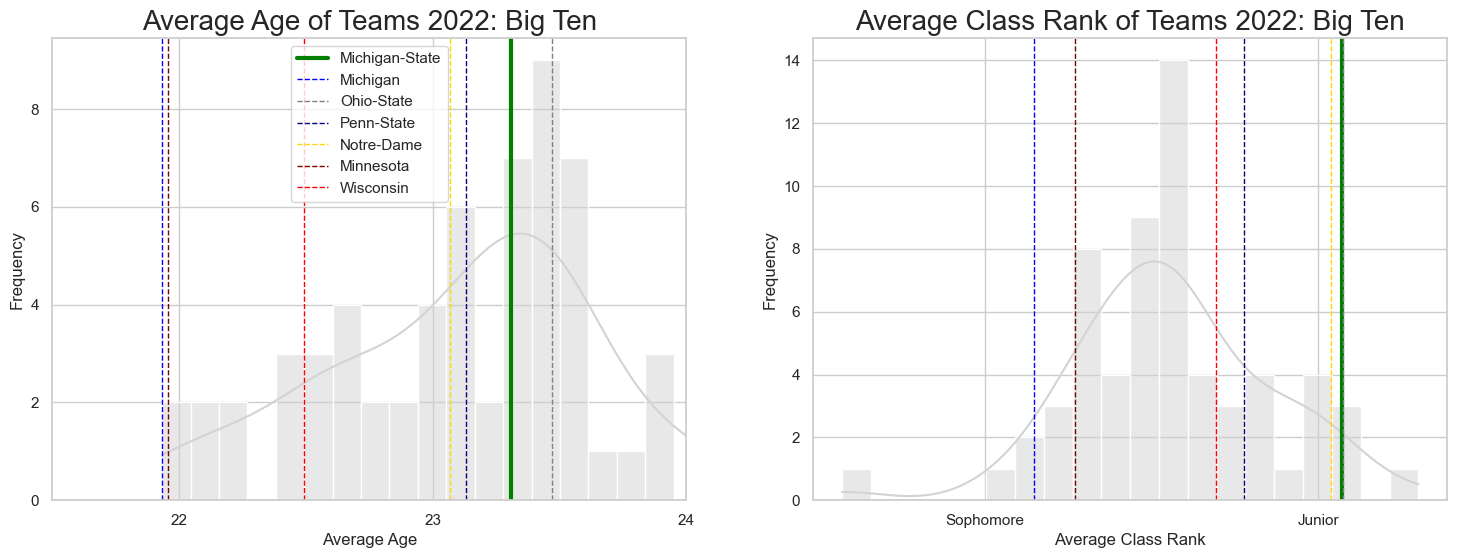

In [454]:
# List of Big Ten Conference members including Michigan State for this analysis
big_ten_teams = ['Michigan-State', 'Michigan', 'Ohio-State', 'Penn-State', 'Notre-Dame', 'Minnesota', 'Wisconsin']

# Filter the grouped_by_team DataFrame to only include Big Ten teams
big_ten_data = grouped_by_team[grouped_by_team['School'].isin(big_ten_teams)].sort_values('Age').reset_index(drop=True)


# Create a color mapping for Big Ten teams to highlight them in the plots.
color_mapping = {
    'Michigan-State': 'green',
    'Michigan': 'blue',
    'Ohio-State': 'grey',
    'Penn-State': 'navy',
    'Notre-Dame': 'gold',
    'Minnesota': 'maroon',
    'Wisconsin': 'red'
}

# Create subplots for visual comparison with the entire dataset
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0], color='lightgrey')
for team in big_ten_teams:
    linestyle = '-' if team == 'Michigan-State' else '--'  # Solid for Michigan State, dashed for others
    linewidth = 3 if team == 'Michigan-State' else 1  # 3 is bolder, 1 is the default width
    axes[0].axvline(grouped_by_team[grouped_by_team['School'] == team]['Age'].values[0], 
                    color=color_mapping[team], linestyle=linestyle, linewidth=linewidth, label=team)
axes[0].set_title(f'Average Age of Teams {year}: Big Ten')
axes[0].title.set_size(20)
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('Frequency')

# Convert x-tick labels into whole years and quarters of a year
axes[0].set_xticks([20.5*365, 21*365, 22*365, 23*365, 24*365])
axes[0].set_xticklabels(['20.5', '21', '22', '23', '24'])
# Set the range of the x-axis based on range of data
axes[0].set_xlim([21.5*365, 24*365])
axes[0].legend()

# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1], color='lightgrey')
for team in big_ten_teams:
    linestyle = '-' if team == 'Michigan-State' else '--'  # Solid for Michigan State, dashed for others
    linewidth = 3 if team == 'Michigan-State' else 1  # 3 is bolder, 1 is the default width
    axes[1].axvline(grouped_by_team[grouped_by_team['School'] == team]['Class_Rank'].values[0], 
                    color=color_mapping[team], linestyle=linestyle, linewidth=linewidth, label=team)
axes[1].set_title(f'Average Class Rank of Teams {year}: Big Ten')
axes[1].title.set_size(20)
axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')


axes[1].set_xticks([2, 3])
axes[1].set_xticklabels(['Sophomore', 'Junior'])
# axes[1].legend()

# plt.tight_layout()
plt.show()


## Dictionary of Conference members

2023-24 Season

In [445]:
# Store a dictionary of conferences and their members
conf_dict = {
    'Atlantic Hockey': ['Air Force', "American Int'l", 'Army', 'Bentley', 'Canisius', 'Holy Cross', 'Mercyhurst', 'Niagara', 'RIT', 'Robert Morris', 'Sacred Heart'],
    'Big Ten': ['Michigan', 'Michigan State', 'Minnesota', 'Notre Dame', 'Ohio State', 'Penn State', 'Wisconsin'],
    'CCHA': ['Augustana', 'Bemidji State', 'Bowling Green', 'Ferris State', 'Lake Superior', 'Michigan Tech', 'Minnesota State', 'Northern Michigan', 'St. Thomas'],
    'ECAC': ['Brown', 'Clarkson', 'Colgate', 'Cornell', 'Dartmouth', 'Harvard', 'Princeton', 'Quinnipiac', 'Rensselaer', 'St. Lawrence', 'Union', 'Yale'],
    'Hockey East': ['Boston College', 'Boston University', 'Connecticut', 'Maine', 'Mass.-Lowell', 'Massachusetts', 'Merrimack', 'New Hampshire', 'Northeastern', 'Providence', 'Vermont'],
    'NCHC': ['Colorado College', 'Denver', 'Miami', 'Minnesota-Duluth', 'Omaha', 'North Dakota', 'St. Cloud State', 'Western Michigan'],
    'Independents': ['Alaska-Anchorage', 'Alaska', 'Arizona State', 'Lindenwood', 'Long Island', 'Stonehill']
}

conference_color_mapping = {
 
    'Atlantic Hockey': 'purple',
    'Big Ten': 'blue',
    'CCHA': 'green',
    'ECAC': 'red',
    'Hockey East': 'orange',
    'NCHC': 'brown',
    'Independents': 'grey'
}

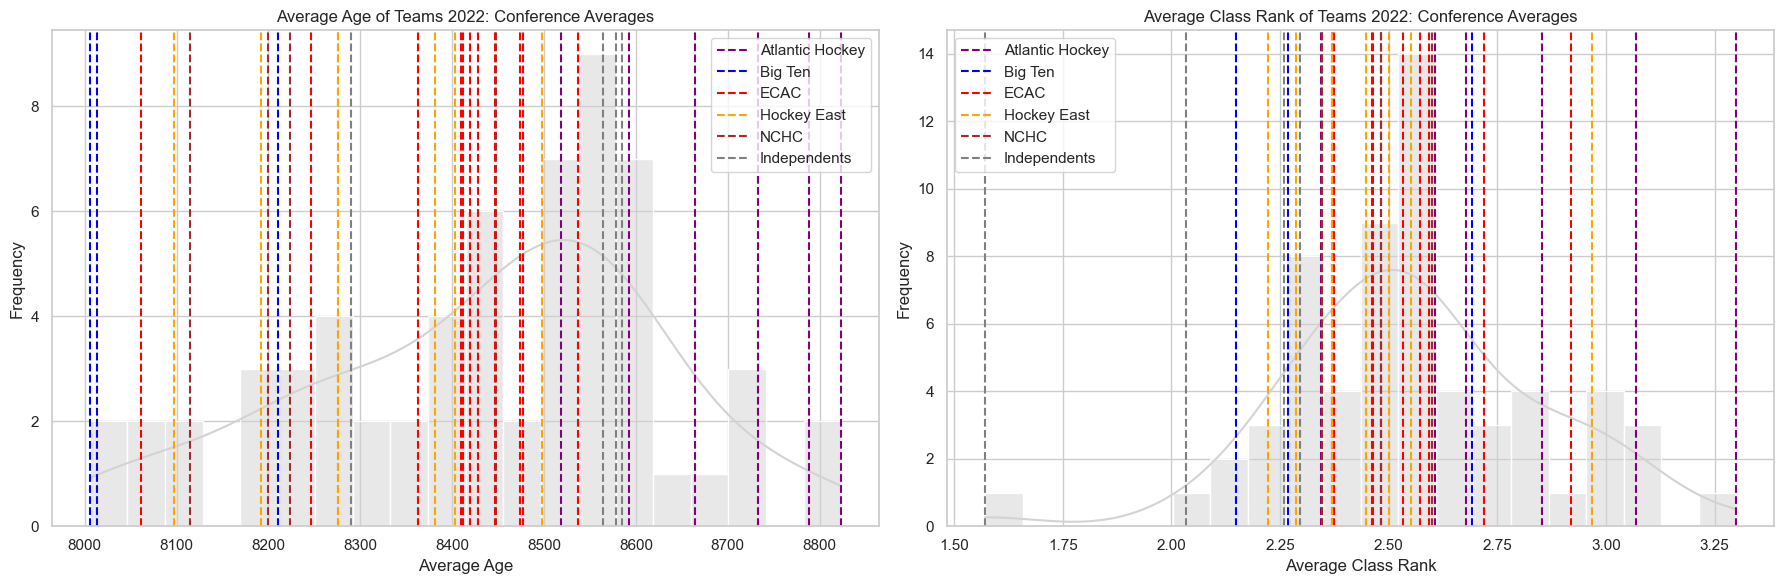

In [446]:
# Filter the data to include only the teams belonging to the conferences in our dictionary
conference_teams = []
for conf, teams in conf_dict.items():
    conference_teams.extend(teams)

conference_data = grouped_by_team[grouped_by_team['School'].isin(conference_teams)].reset_index(drop=True)


# Create subplots for visual comparison with the entire dataset
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Average Age
sns.histplot(grouped_by_team['Age'], kde=True, bins=20, ax=axes[0], color='lightgrey')
for conference, teams in conf_dict.items():
    for team in teams:
        if team in conference_data['School'].values:
            axes[0].axvline(conference_data[conference_data['School'] == team]['Age'].values[0], 
                            color=conference_color_mapping.get(conference, 'grey'), linestyle='--', label=conference)
            
# Remove duplicate labels in the legend
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys())

axes[0].set_title(f'Average Age of Teams {year}: Conference Averages')
axes[0].set_xlabel('Average Age')
axes[0].set_ylabel('Frequency')

# Plot for Class Rank
sns.histplot(grouped_by_team['Class_Rank'], kde=True, bins=20, ax=axes[1], color='lightgrey')
for conference, teams in conf_dict.items():
    for team in teams:
        if team in conference_data['School'].values:
            axes[1].axvline(conference_data[conference_data['School'] == team]['Class_Rank'].values[0], 
                            color=conference_color_mapping.get(conference, 'grey'), linestyle='--', label=conference)
            
# Remove duplicate labels in the legend
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys())

axes[1].set_title(f'Average Class Rank of Teams {year}: Conference Averages')
axes[1].set_xlabel('Average Class Rank')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Calculate the Roster Turnover from 2022 to 2023 for relevant teams
- B1G Teams
- All other MSU scheduled opponenets

Will need to open the two dataframes, filter to relvant teams and look for each player name from one roster on the other, create list of players on both and players only on past and only on current

### Create list of MSU Opponents & a Dictionary of logo file paths

In [447]:
## Open clean copy of rosters

df_recent = pd.read_csv('../../data/rosters/2023_master_roster.csv')
df_last = pd.read_csv('../../data/rosters/2022_master_roster.csv')

## Global variables - list of teams, list of conferences, and color mapping

# List of Big Ten Conference members including Michigan State for this analysis
big_ten_teams = ['Michigan-State', 'Michigan', 'Ohio-State', 'Penn-State', 'Notre-Dame', 'Minnesota', 'Wisconsin']
other_teams = ['Boston-College', 'Ferris-State', 'Air-Force', 'Canisius']

all_opponents = big_ten_teams + other_teams

# all teams in represented in the data
all_teams = list(df_recent['School'].unique())

# Create a color mapping for Big Ten teams to highlight them in the plots.
big_ten_color_mapping = {
    'Michigan State': 'darkgreen',
    'Michigan': 'blue',
    'Ohio State': 'grey',
    'Penn State': 'navy',
    'Notre Dame': 'gold',
    'Minnesota': 'maroon',
    'Wisconsin': 'red'
}

other_teams = ['Boston-College', 'Ferris-State', 'Air-Force', 'Canisius']

other_color_mapping = {
    'Boston College': 'maroon',
    'Ferris State': 'yellow',
    'Air Force': 'blue',
    'Canisius': 'gold'
}

# Combine the two color mappings
color_mapping = {**big_ten_color_mapping, **other_color_mapping}


# Logo mapping
logo_folder = '../logos/'

logo_mapping = {
    'Michigan State': logo_folder + 'msu.png',
    'Michigan': logo_folder + 'uofm.png',
    'Ohio State': logo_folder + 'osu.png',
    'Penn-State': logo_folder + 'psu.png',
    'Notre Dame': logo_folder + 'ndm.png',
    'Minnesota': logo_folder + 'min.png',
    'Wisconsin': logo_folder + 'wis.png',
    'Boston College': logo_folder + 'bc_.png',
    'Ferris State': logo_folder + 'fsu.png',
    'Air Force': logo_folder + 'afa.png',
    'Canisius': logo_folder + 'cns.png'
}

# # Check to see if the logo files exist
# from pathlib import Path

# for team, logo_path in logo_mapping.items():
#     if not Path(logo_path).exists():
#         print(f'{logo_path} does not exist!')
#     else:
#         print(f'{logo_path} exists!')






### Filter the roster files to only MSU & Opponents

In [448]:
## Filter the current roster

# # Filter the data to include only the teams in the all teams list
# df_recent = df_recent[df_recent['School'].isin(all_teams)].reset_index(drop=True)
# df_last = df_last[df_last['School'].isin(all_teams)].reset_index(drop=True)

df_recent.head()
print(f'Number of players in recent roster: {len(df_recent)}')
print(f'Nu8mber of teams in recent roster: {len(df_recent["School"].unique())}')
print(f'Number of players in last roster: {len(df_last)}')
print(f'Nu8mber of teams in last roster: {len(df_last["School"].unique())}')

    

Number of players in recent roster: 1658
Nu8mber of teams in recent roster: 59
Number of players in last roster: 1748
Nu8mber of teams in last roster: 62


In [449]:
## Function to compare the members of each team to the previous year and return information about roster turnover

from collections import Counter

def compare_rosters(df_recent, df_last, team):
    # Filter the dataframes by the team
    df_recent_team = df_recent[df_recent['School'] == team]
    df_last_team = df_last[df_last['School'] == team]
    
    # Set of player names for easier comparison
    recent_players = set(df_recent_team['Name'])
    last_players = set(df_last_team['Name'])
    
    # Calculate turnover stats
    new_players = recent_players - last_players
    departed_players = last_players - recent_players
    retained_players = recent_players.intersection(last_players)
    
    # Additional stats like turnover rate, etc.
    turnover_rate = len(departed_players) / len(last_players) * 100 if len(last_players) > 0 else 0
    
    # Count of players in each class rank for both data sets
    recent_class_count = Counter(df_recent_team['Yr.'])
    last_class_count = Counter(df_last_team['Yr.'])
    
    # Calculate how many players from each class were departed and retained
    departed_class_count = Counter(df_last_team[df_last_team['Name'].isin(departed_players)]['Yr.'])
    retained_class_count = Counter(df_last_team[df_last_team['Name'].isin(retained_players)]['Yr.'])
    
    return {
        'new_players': len(new_players),
        'departed_players': len(departed_players),
        'retained_players': len(retained_players),
        'turnover_rate': turnover_rate,
        'recent_class_count': recent_class_count,
        'last_class_count': last_class_count,
        'departed_class_count': departed_class_count,
        'retained_class_count': retained_class_count
    }


# Define a list of teams for analysis (you can replace this list with 'all_teams' or any specific list you have)
# teams_to_analyze = ['Michigan', 'Michigan-State', 'Ohio-State']

# Use the entire list of teams
teams_to_analyze = all_teams

# Initialize an empty list to store results
results_list = []

# Loop through each team and get the turnover stats
for team in teams_to_analyze:
    team_stats = compare_rosters(df_recent, df_last, team)
    team_stats['team'] = team  # Add team name to the result dictionary
    results_list.append(team_stats)

# Convert the list of dictionaries to a DataFrame
df_turnover_stats = pd.DataFrame(results_list)

# df_turnover_stats

# # Store the a seperate dictionary of the relevant class rank columns for each team to use later in the html table

# # Initialize an empty dictionary
# class_rank_columns = {}

# # Loop through each team and get the class rank columns (departed, retained, new)
# for row in df_turnover_stats:
#     team = row['team']
#     class_rank_columns[team] = {
#         'departed': row['departed_class_count'],
#         'retained': row['retained_class_count'],
#         'new': row['new_class_count']
#     }






# ## Call function to test single team print results

# compare_rosters(df_recent, df_last, 'Michigan')


In [450]:
## Calculate where MSU ranks in terms of roster turnover

# sort by turnover rate - Highest to lowest
df_turnover_stats.sort_values('turnover_rate', ascending=False, inplace=True)

# Reset the index
df_turnover_stats.reset_index(drop=True, inplace=True)

# Find where Michigan State ranks in terms of roster turnover
msu_turnover_rate = df_turnover_stats[df_turnover_stats['team'] == 'Michigan-State']['turnover_rate'].values[0]

# Find the rank among all teams
msu_turnover_rate_rank = df_turnover_stats[df_turnover_stats['team'] == 'Michigan-State'].index[0] + 1

# Find Boston College's turnover rate and place in the rankings
bc_turnover_rate = df_turnover_stats[df_turnover_stats['team'] == 'Boston-College']['turnover_rate'].values[0]
bc_turnover_rate_rank = df_turnover_stats[df_turnover_stats['team'] == 'Boston-College'].index[0] + 1

# Total number of teams for context
total_teams = len(df_turnover_stats)

# Print a summary
print(f'Michigan State ranks {msu_turnover_rate_rank}/{total_teams} in terms of roster turnover with a turnover rate of {msu_turnover_rate:.2f}%.')
print(f'Boston College ranks {bc_turnover_rate_rank}/{total_teams} in terms of roster turnover with a turnover rate of {bc_turnover_rate:.2f}%.')


Michigan State ranks 2/59 in terms of roster turnover with a turnover rate of 57.14%.
Boston College ranks 4/59 in terms of roster turnover with a turnover rate of 51.85%.


## Vizulize the Roster Turnover for Two teams

In [453]:
from IPython.core.display import display, HTML

df_to_plot = df_turnover_stats.copy()

# Filter down to only relevant teams
matchup = ['Michigan-State', 'Boston-College']

df_to_plot = df_to_plot[df_to_plot['team'].isin(matchup)].reset_index(drop=True)

# Reorder the metrics and their labels as per the user's preference
reordered_metrics_labels = ['Retained Players', 'Departed Players', 'New Players', 'Turnover Rate']

# Initialize HTML table with updated styling
html_table = '<table style="width:100%; border:1px solid black; border-collapse: collapse; font-family: Verdana, sans-serif;">'

# Add header row for metric descriptions and team logos
html_table += '<thead><tr>'
# Add an empty cell at the beginning of the header row for alignment
html_table += '<th></th>'
for team in df_to_plot['team']:
    # Use the color mapping for background color and adjust for better contrast (lighter shade)
    team_color = color_mapping.get(team.replace('-', ' '), '#f1f1f1')  # Handle the hyphen issue
    team_color = f"background-color: {team_color};"
    # Use logo_mapping to fetch the logo path
    logo_path = logo_mapping.get(team.replace('-', ' '), 'path/to/default_logo.png')  # Handle the hyphen issue
    html_table += f'<th style="{team_color} text-align: center;"><img src="{logo_path}" alt="{team}" width="50"><br>{team}</th>'
# Close header row
html_table += '</tr></thead>'

# Add body with metrics
html_table += '<tbody>'
for metric_label in reordered_metrics_labels:
    # Add a central column for metric descriptions
    extra_style = "font-weight: bold; font-size: larger;" if metric_label == "Turnover Rate" else ""
    html_table += f'<tr><td style="text-align: center; font-weight: bold;">{metric_label}</td>'
    for team, values in df_to_plot.iterrows():
        metric_value = values[metric_label.lower().replace(" ", "_")]
        # Format turnover rate as a percentage with one decimal place
        if metric_label == 'Turnover Rate':
            metric_value = f"{metric_value:.1f}%"
        # Use the color mapping for background color and adjust for better contrast (darker text)
        team_color = color_mapping.get(values['team'].replace('-', ' '), '#f1f1f1')  # Handle the hyphen issue
        team_color = f"background-color: {team_color}; color: white;"
        html_table += f'<td style="border:1px solid black; text-align:center; {team_color} {extra_style}">{metric_value}</td>'
    html_table += '</tr>'
html_table += '</tbody>'

# Close table tag
html_table += '</table>'

# Display HTML table
display(HTML(html_table))



C:\Users\Justin\AppData\Local\Temp\ipykernel_13872\1080928969.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,Michigan-State,Boston-College
Retained Players,12,13
Departed Players,16,14
New Players,15,14
Turnover Rate,57.1%,51.9%


### Attempt with Return and Departing 

#### The sub tables are not working and only display dummy data right now

In [452]:
# Helper function to create a mini-table for class rank distribution
def create_mini_table(class_dict, team_color):
    mini_table = '<table style="width:100%; border-collapse: collapse; background-color: transparent;">'
    for class_rank, count in class_dict.items():
        mini_table += f'<tr><td style="background-color: {team_color}; color: white;">{class_rank}</td><td style="background-color: {team_color}; color: white;">{count}</td></tr>'
    mini_table += '</table>'
    return mini_table

# Initialize HTML table with updated styling
html_table = '<table style="width:100%; border:1px solid black; border-collapse: collapse; font-family: Verdana, sans-serif;">'

# Add header row for metric descriptions and team logos
html_table += '<thead><tr>'
# Add an empty cell at the beginning of the header row for alignment
html_table += '<th style="background-color: #f1f1f1;"></th>'
for team in df_to_plot['team']:
    # Use the color mapping for background color and adjust for better contrast (lighter shade)
    team_color = color_mapping.get(team.replace('-', ' '), '#f1f1f1')  # Handle the hyphen issue
    team_color = f"background-color: {team_color};"
    # Use logo_mapping to fetch the logo path
    logo_path = logo_mapping.get(team.replace('-', ' '), 'path/to/default_logo.png')  # Handle the hyphen issue
    html_table += f'<th style="{team_color} text-align: center;"><img src="{logo_path}" alt="{team}" width="50"><br>{team}</th>'
# Close header row
html_table += '</tr></thead>'

# Add body with metrics
html_table += '<tbody>'
for metric_label in reordered_metrics_labels:
    # Rowspan for making room for the mini-tables
    rowspan = ' rowspan="2"' if metric_label in ['Retained Players', 'Departed Players', 'New Players'] else ''
    # Add a central column for metric descriptions
    extra_style = "font-weight: bold; font-size: larger;" if metric_label == "Turnover Rate" else ""
    html_table += f'<tr><td style="background-color: #f1f1f1; text-align: center; font-weight: bold;"{rowspan}>{metric_label}</td>'
    for team, values in df_to_plot.iterrows():
        metric_value = values[metric_label.lower().replace(" ", "_")]
        # Format turnover rate as a percentage with one decimal place
        if metric_label == 'Turnover Rate':
            metric_value = f"{metric_value:.1f}%"
        # Use the color mapping for background color and adjust for better contrast (darker text)
        team_color = color_mapping.get(values['team'].replace('-', ' '), '#f1f1f1')  # Handle the hyphen issue
        team_color = f"background-color: {team_color}; color: white;"
        html_table += f'<td style="border:1px solid black; text-align:center; {team_color} {extra_style}"{rowspan}>{metric_value}</td>'
    html_table += '</tr>'
    
    # Add the mini-tables for 'Retained Players' and 'Departed Players'
    if metric_label in ['Retained Players', 'Departed Players', 'New Players']:
        # Create a mock dictionary for class rank distribution (you should replace this with your actual data)
        mock_class_rank_dict = {'Freshman': 3, 'Sophomore': 2, 'Junior': 4, 'Senior': 1}  # Replace with your actual data
        html_table += '<tr>'
        for team in df_to_plot['team']:
            team_color = color_mapping.get(team.replace('-', ' '), '#f1f1f1')  # Handle the hyphen issue
            mini_table = create_mini_table(mock_class_rank_dict, team_color)
            html_table += f'<td style="border:1px solid black; text-align:center;">{mini_table}</td>'
        html_table += '</tr>'
    
html_table += '</tbody>'

# Close table tag
html_table += '</table>'

# Display HTML table
display(HTML(html_table))

